In [1]:
#from ipynb.fs.full.Models import *
#import import_ipynb
#from Models import *
%run Models.ipynb
download = False

In [2]:
country='Italy'
j=c_index[country]
j

0

# BEST PLOTS for each SIR-type model and for all countries
Criterion: AIC based on a time-series cost function

In [3]:
#time params
lock_params = ['t_lock', 'beta_lock']
exp_params = ['alpha']
fermi_params = ['alpha', 't_lock']
rational_params = ['alpha']
time_params = [lock_params,exp_params,fermi_params,rational_params]
time_params

[['t_lock', 'beta_lock'], ['alpha'], ['alpha', 't_lock'], ['alpha']]

In [4]:
sirtypes = [SIR,SIAR,SEIAR]
sirtype_strings = ['SIR','SIAR','SEIAR']

In [5]:
# We use this piece of code to suppress the output from Models
# courtesy: https://thesmithfam.org/blog/2012/10/25/temporarily-suppress-console-output-in-python/

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

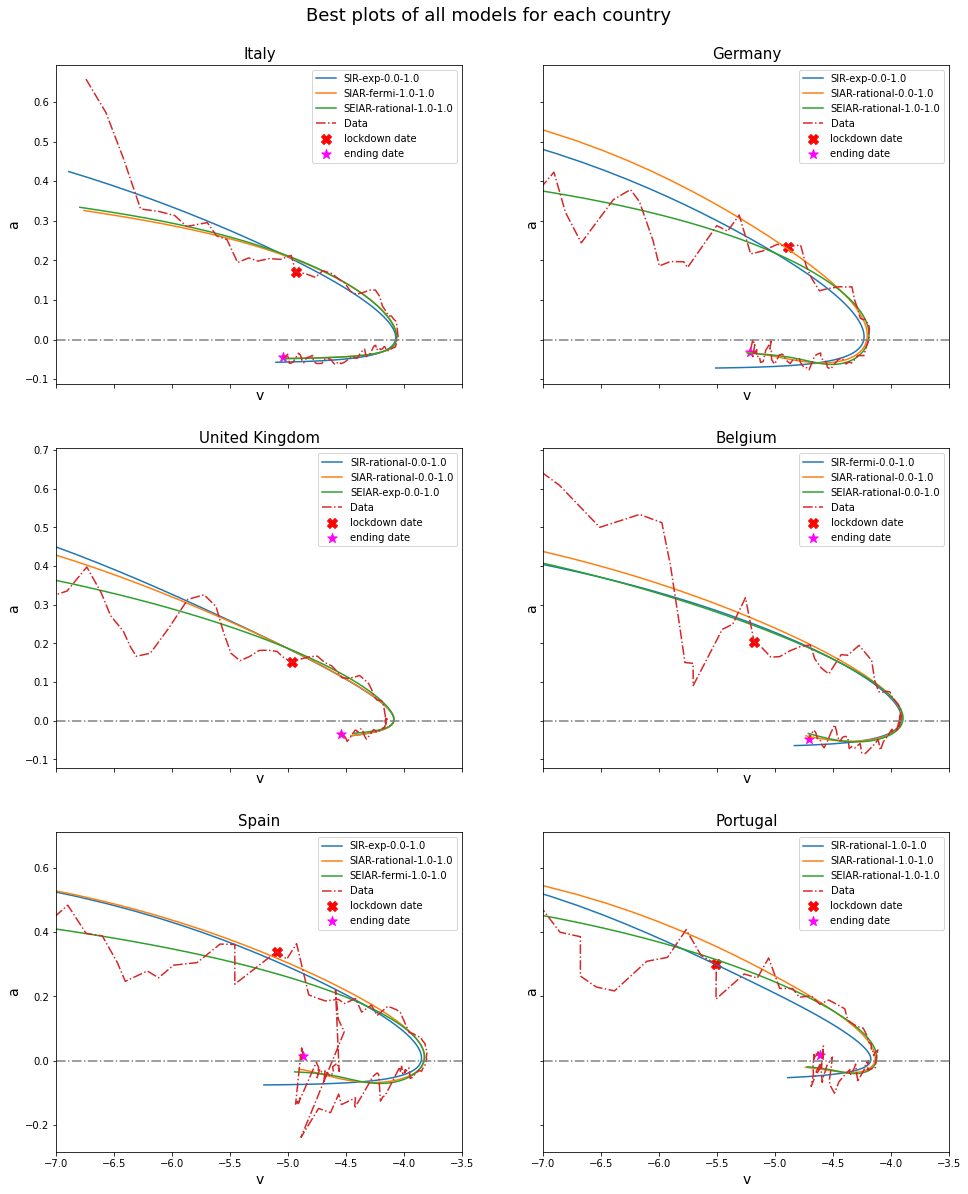

In [17]:
mods = []
best_params = []
labels = []
country_list = ['Italy','Germany','United Kingdom','Belgium','Spain','Portugal']
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row',figsize=(16,20))
row=0
col=0
for country in country_list:
    mods = []
    if col==2:
        row+=1
        col=0
    for i, sirtype in enumerate(sirtypes):
        #####params
        csv = pd.read_csv('params/'+sirtype_strings[i]+'_models.csv', sep=',',index_col=0)
        csv = csv[csv.country==country]

        best = csv.iloc[0]
        time = best[4]
        weight = [best[5],best[6]]
        #load params
        opt_params = []
        #SIR-mod params
        for p in best.keys()[7:-3]: #general for SIAR, SEIAR
            opt_params.append(best[p])
        #time params
        j = [i for i in range(4) if times[i]==time][0]
        for p in time_params[j]:
            opt_params.append(best[p])

        #####model
        with suppress_stdout(): #Suppress the printing of Models()
            mod = Model(country,sirtype,time=time,start=starts[c_index[country]])

        #####label
        label= sirtype_strings[i]+'-'+time+'-'+str(weight[0])+'-'+str(weight[1])
        v_sim,a_sim = mod.predict(opt_params)
        ax[row,col].plot(v_sim,a_sim, label=label)


    #data
    ax[row,col].plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax[row,col].scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax[row,col].scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    #beauty corner
    ax[row,col].set_xlim([-7., -3.5]) #not useful for fixed country
    ax[row,col].axhline(y=0, color='gray', linestyle='-.')
    ax[row,col].legend()
    ax[row,col].set_xlabel('v', size=14)
    ax[row,col].set_ylabel('a', size=14)
    ax[row,col].set_title(country,size=15)
    col+=1
plt.suptitle("Best plots of all models for each country",y=0.92,size=18)    
#plt.savefig("best_plots_all.jpg")    
plt.show()

In [7]:
best = [] #empty list whose elements are the best models of [SIR,SIAR,SEIAR] of a country
mods = ['SIR','SIAR','SEIAR']
for mod in mods:
    csv = pd.read_csv('params/'+mod+'_models.csv', sep=',',index_col=0)
    csv = csv[csv.country=='Belgium']
    best.append(csv.iloc[0])

best_model_index = np.argmin(np.array([best[0][1],best[1][1],best[2][1]]))
best=best[best_model_index]
time = best[4]
weight = [best[5],best[6]]


In [8]:
opt_params

[4.542630528916658,
 0.8082805877958389,
 0.9810775537343928,
 1.0083201845458356,
 1.0297522338155027e-07,
 5.408785955504568e-14,
 0.04589848879625104]

### Best model with Best time dependency unlike the previous comparison, where we had SIR, SIAR and SEIAR. Here only a single model for a single country that shows the best fit is considered. 

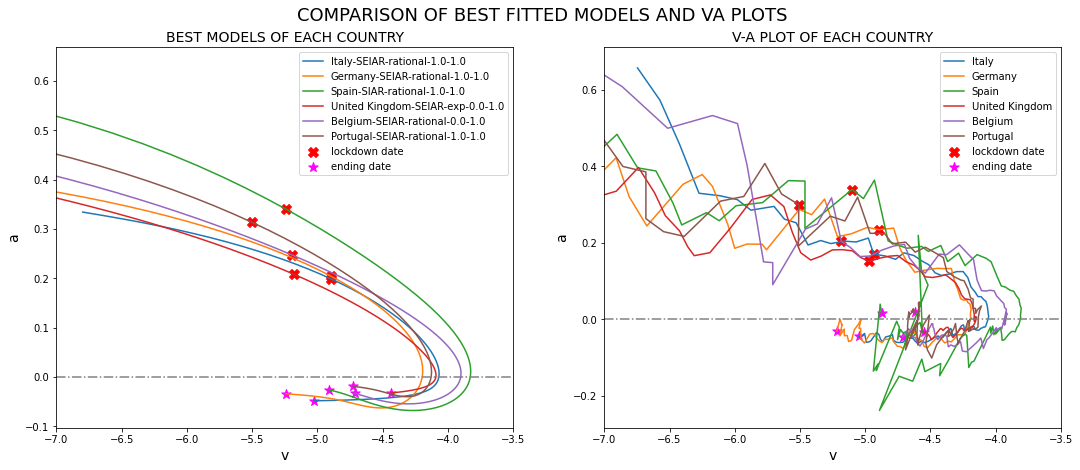

In [16]:

country_list = ['Italy','Germany','Spain','United Kingdom','Belgium','Portugal']
fig, (ax, ax2) = plt.subplots(1,2,figsize=(18,7))

mods = ['SIR','SIAR','SEIAR']
sirtype = [SIR,SIAR,SEIAR]

for country in country_list:
    best = [] #empty list whose elements are the best models of [SIR,SIAR,SEIAR] of a country
    for mod in mods:
        csv = pd.read_csv('params/'+mod+'_models.csv', sep=',',index_col=0)
        csv = csv[csv.country==country]
        best.append(csv.iloc[0])
    
    best_model_index = np.argmin(np.array([best[0][1],best[1][1],best[2][1]]))
    best=best[best_model_index]
    time = best[4]
    weight = [best[5],best[6]]
    
    #load params
    opt_params = []
    #SIR-mod params
    for p in best.keys()[7:-3]: #general for SIAR, SEIAR
        opt_params.append(best[p])
    #time params
    j = [i for i in range(4) if times[i]==time][0]
    for p in time_params[j]:
        opt_params.append(best[p])

    #####model
    with suppress_stdout(): #Suppress the printing of Models()
        mod = Model(country,sirtype[best_model_index],time=time,start=starts[c_index[country]])

    #####label
    label= country+'-'+mods[best_model_index]+'-'+time+'-'+str(weight[0])+'-'+str(weight[1])
    v_sim,a_sim = mod.predict(opt_params)
    # Only fitted plot
    ax.plot(v_sim,a_sim, label=label)
    if country=='Portugal':
        ax.scatter(v_sim[mod.lock_index-L-z-1], a_sim[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100,label='lockdown date')
        ax.scatter(v_sim[-1], a_sim[-1], 
                c='magenta',marker='*',s=100,zorder=2,label='ending date')
    else:
        ax.scatter(v_sim[mod.lock_index-L-z-1], a_sim[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100)
        ax.scatter(v_sim[-1], a_sim[-1], 
                c='magenta',marker='*',s=100,zorder=2)
        
    # v-a fitted plot
    ax2.plot(mod.v_data, mod.a_data, label=country)
    if country=='Portugal':
        ax2.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                        c='red',marker='X',s=100, label='lockdown date')
        ax2.scatter(mod.v_data[-1], mod.a_data[-1], 
                        c='magenta',marker='*',s=100,zorder=2, label='ending date')
    else:
        ax2.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                        c='red',marker='X',s=100)
        ax2.scatter(mod.v_data[-1], mod.a_data[-1], 
                        c='magenta',marker='*',s=100,zorder=2)


#beauty corner
ax.set_xlim([-7., -3.5]) #not useful for fixed country
ax.axhline(y=0, color='gray', linestyle='-.')
ax.legend()
ax.set_xlabel('v', size=14)
ax.set_ylabel('a', size=14)
ax.set_title('BEST MODELS OF EACH COUNTRY',size=14)

ax2.set_xlim([-7., -3.5]) #not useful for fixed country
ax2.axhline(y=0, color='gray', linestyle='-.')
ax2.legend()
ax2.set_xlabel('v', size=14)
ax2.set_ylabel('a', size=14)
ax2.set_title('V-A PLOT OF EACH COUNTRY',size=14)

plt.suptitle("COMPARISON OF BEST FITTED MODELS AND VA PLOTS",y=0.96,size=18)
plt.savefig("compare_best_fits.jpg")

plt.show()